<a href="https://colab.research.google.com/github/marcossiliprandi/MVP_Machine-learning_Analytics/blob/main/MVP_Classificador_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP da sprint Machine Learning & Analytics**

Uma determinada instituição financeira encontra-se com problemas na liberação de crédito a seus clientes, que vem gerando prejuízos financeiros.

Considerando que o principal problema está em classificar os clientes como bons e maus pagadores, irei utilizar algorítimos de machine learning de classificação para que a instituição possa realizar a liberação de credito de forma mais assertiva.

Utilizando um dataset que possui os dados históricos dos clientes com informações como idade, duração, histórico de crédito, finalidade, fiador, estado civil, emprego entre outros. Esses dados estão associados ao atributo classe que identifica se o cliente é ou não um bom pagador.

In [1]:
# Para iniciar será realizado a importação das bibliotecas necessárias

# Importar, manipular e analisar dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # Criação de gráficos
from sklearn.model_selection import train_test_split # Separar base de teste e treino
from sklearn.metrics import accuracy_score # Mostrar acurácia
from sklearn.preprocessing import LabelEncoder # Transformar atributos em numéricos

# Algorítimos de machine learning de classificação
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Árvore de Classificação
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.svm import SVC #SVM

# Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##Preparando os dados

Neste bloco de código estarei utilizando o Pandas para carregar o dataset. Em seguida será criado a matriz de dados e a matriz classes (target) que serão utilizadas no método train_test_split para alimentar de forma aleatória as variáveis de treino e teste conforme a técnica holdout, como possuímos dados categóricos utiliza-se a biblioteca LabelEncoder para transformá-los em numérico e para finalizar a fase de preparação de dados criaremos o Folds para realizar a validação cruzada.

In [2]:
# Carregando os dados do dataset que se encontra no Github e utilizando o Pandas para tranformar em Dataframe.

url_dados = 'https://raw.githubusercontent.com/marcossiliprandi/MVP_Machine-learning_Analytics/main/Credit.csv'

credito = pd.read_csv(url_dados)

In [9]:
# Formatando a matriz dados e classe (target)

dados = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [10]:
# Transformando atributos categóricos em numéricos

for x in range(20):
  if type(dados[:,x][0]) == str:
    dados[:, x] = LabelEncoder().fit_transform(dados[:, x])

In [11]:
#Aplicando a técnica holdout para separar os dados de em 30% para teste e 70% para treino. Para manter a mesma amostragem durante a execução estou utilizando o parâmetro random_state

X_treino, X_teste, y_treino, y_teste = train_test_split(dados, classe, test_size = 0.3, random_state = 10)

In [12]:
# Criando os folds para a validação cruzada

kfold = KFold(n_splits=5, shuffle=True, random_state=10) #Particionando em 5 folds

## Modelagem

Para encontrar o melhor modelo entre os selecionados no inicio do código, os algorítimos serão testados uma a um no método de validação cruzada utilizando como método de avaliação a acurácia. Após a avaliação de todos os algorítimos, um boxplot e a média das acurácias irão ser impressas na tela para a avaliação do melhor modelo a ser utilizados para realizar o treinamento e teste.

In [31]:
# Criando listas para armazenar os nomes e metodos dos algoritimos a serem testados

modelos = []
nomes = []

# Lista para armazenar os resultados da avaliação

resultados = []

# Carregando a lista modelos
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))


In [33]:
# Função utilizada para manter o resultado em novas execuções

np.random.seed(10)

# Realizando a avaliação de cada modelo

for nome, modelo in modelos:
  resultado = cross_val_score(modelo, X_treino, y_treino, cv=kfold, scoring='accuracy')
  resultados.append(resultado)
  nomes.append(nome)
  print("%s: %f (%f)" % (nome, resultado.mean(), resultado.std()))

KNN: 0.650000 (0.036978)
CART: 0.671429 (0.050910)
NB: 0.700000 (0.045848)
SVM: 0.714286 (0.043566)


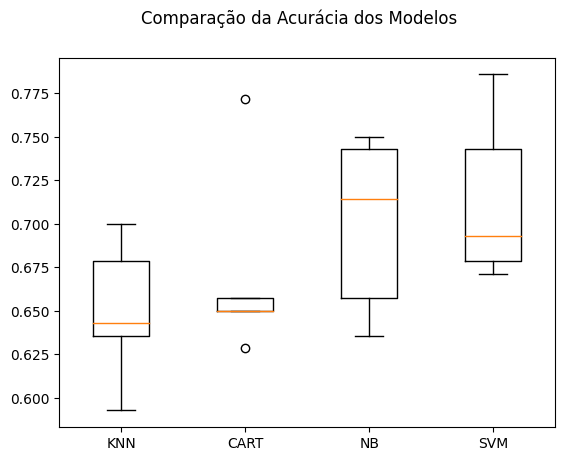

In [35]:
# Mostrando gráfico comparativo das acurácias dos modelos

fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [43]:
# Analisando as informações de acurácia de cada modelo, optarei por seguir o treinamento utilizando o algoritimo SVM

# Criando o modelo de teste

modelo = SVC()
modelo.fit(X_treino,y_treino)

# Realizando as predições de testes

predicao = modelo.predict(X_teste)

# Verificando acurácia de teste

acur = accuracy_score(y_teste,predicao)
print("A acurácia do conjunto de teste é de %f" % (acur))

A acurácia do conjunto de teste é de 0.693333


In [44]:
predicao

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g

In [41]:
# Criando o modelo de teste

modelo = GaussianNB()
modelo.fit(X_treino,y_treino)

# Realizando as predições de testes

predicao = modelo.predict(X_teste)

# Verificando acurácia de teste

acur = accuracy_score(y_teste,predicao)
print("A acurácia do conjunto de teste é de %f" % (acur))

A acurácia do conjunto de teste é de 0.703333


In [45]:
predicao

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'g